In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import itertools as it
plt.rcParams['figure.figsize'] = [12, 8]


In [36]:
train = pd.read_csv("Train.csv")
train.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


In [37]:
train.drop(columns = ["dw_11", "dw_12", "dw_13", "psa_02", "psa_03", "psa_04", "lan_14", "pw_07", "pw_08"])

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,ZA4161005,-29.409381,25.290165,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,34503001: Ward 1,3261.68067,11551.56486,6.393480,0.874972,0.003146,0.017230,0.004735,0.048888,0.000654,...,0.074058,0.000472,0.000472,0.000472,0.000000,0.006203,ZA3453001,-27.675590,23.057920,9.118927
2818,34503002: Ward 2,1463.06432,7908.90411,15.668000,0.636235,0.002262,0.010433,0.000000,0.003030,0.000000,...,0.557859,0.003467,0.003030,0.000713,0.000000,0.008414,ZA3453002,-27.591408,22.907161,1.697395
2819,34503003: Ward 3,1395.18881,6242.37527,13.238795,0.855975,0.006601,0.061118,0.000812,0.003912,0.000812,...,0.326884,0.046445,0.002150,0.001458,0.000000,0.003670,ZA3453003,-27.952550,22.749698,2.792501
2820,34503004: Ward 4,1679.66964,8014.73089,17.639523,0.792552,0.004423,0.016099,0.000000,0.000674,0.000000,...,0.301241,0.108998,0.009235,0.007870,0.000000,0.004803,ZA3453004,-27.913875,22.755314,2.793699


In [38]:
var_desc_original = pd.read_csv('variable_descriptions.csv')
var_desc_original

,Column,Description,Unnamed: 2,Unnamed: 3
0,dw_00,Percentage of dwellings of type: House or bric...,NaN,NaN
1,dw_01,Percentage of dwellings of type: Traditional d...,NaN,NaN
2,dw_02,Percentage of dwellings of type: Flat or apart...,NaN,NaN
3,dw_03,Percentage of dwellings of type: Cluster house...,NaN,NaN
4,dw_04,Percentage of dwellings of type: Townhouse (se...,NaN,NaN
5,dw_05,Percentage of dwellings of type: Semi-detached...,NaN,NaN
6,dw_06,Percentage of dwellings of type: House/flat/ro...,NaN,NaN
7,dw_07,Percentage of dwellings of type: Informal dwel...,in backyard),NaN
8,dw_08,Percentage of dwellings of type: Informal dwel...,not in backyard,e.g. in an informal/squatter settlement or on...
9,dw_09,Percentage of dwellings of type: Room/flatlet ...,NaN,NaN


In [34]:
# Column segments used to quickly access dataframe slices corresponding with
# variable groups

piped_water = train.loc[:, "pw_00": "pw_06"]
dwelling_type = train.loc[:, "dw_00": "dw_10"]
car = train.loc[::, "car_00": "car_01"]
language = train.loc[:, "lan_00": "lan_13"]
satellite_tv =  train.loc[:, "stv_00":"stv_01"]
landline =  train.loc[:, "lln_00":"lln_01"]
school = train.loc[:, "psa_00":"psa_02"]
lighting = train.loc[:, "lgt_00"]
pop_group = train.loc[:, "pg_01":"pg_04"]

In [85]:
# Function used to give a visual representation of correlations between the target
# and variables within one of the above-defined segments

# can also take raw input in the form train.loc[:, col1:col2]

def segmentCorrelation(segment):
    for col in segment.columns:
        print(f"Correlation between target and {col}: {train.target.corr(df[col])}")

#### Graphing

<AxesSubplot:title={'center':'Present School Attendance 01 vs. Target'}, xlabel='psa_00', ylabel='target'>

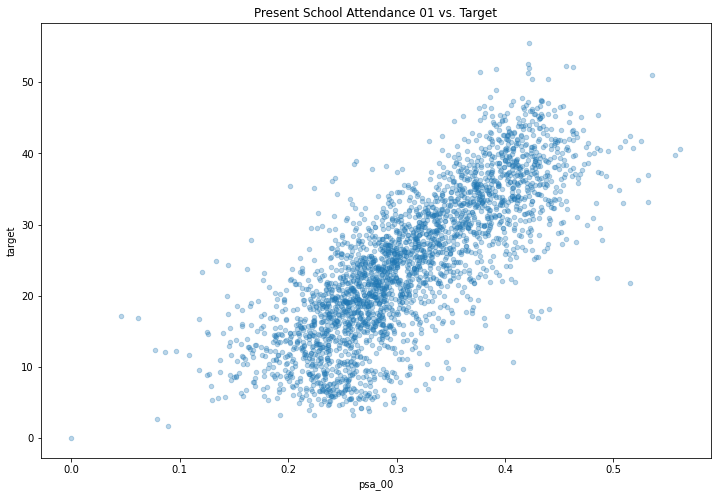

In [90]:
# Plot for psa_00 vs target

train.plot(x='psa_00', y='target', kind='scatter', alpha=0.3, title = 'Present School Attendance\
 00 vs. Target')


<AxesSubplot:title={'center':'Present School Attendance 00 vs. Target'}, xlabel='psa_01', ylabel='target'>

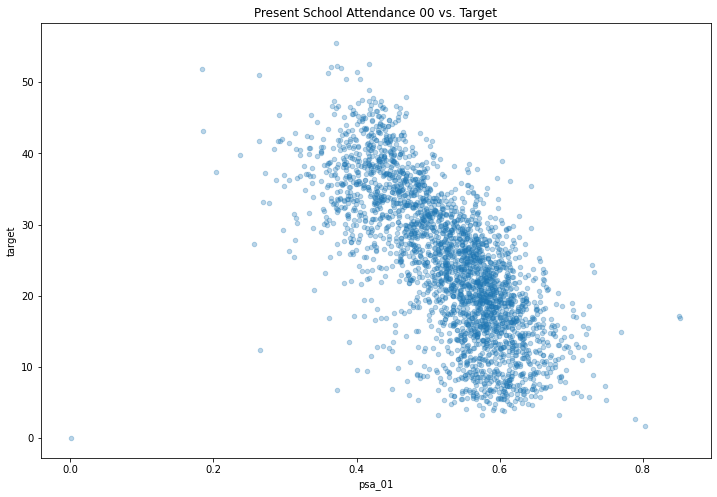

In [91]:
# Plot for psa_01 vs target

train.plot(x='psa_01', y='target', kind='scatter', alpha=0.3, title = 'Present School Attendance\
 00 vs. Target')